In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['figure.facecolor'] ='#ffe5b4'

In [10]:
df_report = pd.read_csv("/home/vincey/Desktop/data anaylsis/world-happiness-report-2021.csv")
df_report.tail()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205
148,Afghanistan,South Asia,2.523,0.038,2.596,2.449,7.695,0.463,52.493,0.382,-0.102,0.924,2.43,0.370,0.000,0.126,0.000,0.122,0.010,1.895


In [11]:
df_report_columns = ['Country name','Regional indicator','Ladder score','Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']

In [12]:
df_report = df_report[df_report_columns].copy()

In [13]:
happy_df = df_report.rename(columns={'Country name':'country','Regional indicator':'regional_indicator','Ladder score':'ladder_score','Logged GDP per capita':'logged_GDP_per_capita','Social support':'social_support','Generosity':'generosity','Healthy life expectancy':'healthy_life_expectancy','Perceptions of corruption':'perceptions_of_corruption','Freedom to make life choices':'freedom_to_make_life_choices'})

In [14]:
happy_df.head()

,country,regional_indicator,ladder_score,logged_GDP_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [15]:
happy_df.isnull().sum()

country                         0
regional_indicator              0
ladder_score                    0
logged_GDP_per_capita           0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
dtype: int64

In [16]:
happy_df.count()

country                         149
regional_indicator              149
ladder_score                    149
logged_GDP_per_capita           149
social_support                  149
healthy_life_expectancy         149
freedom_to_make_life_choices    149
generosity                      149
perceptions_of_corruption       149
dtype: int64

Text(0, 0.5, 'GDP per capita')

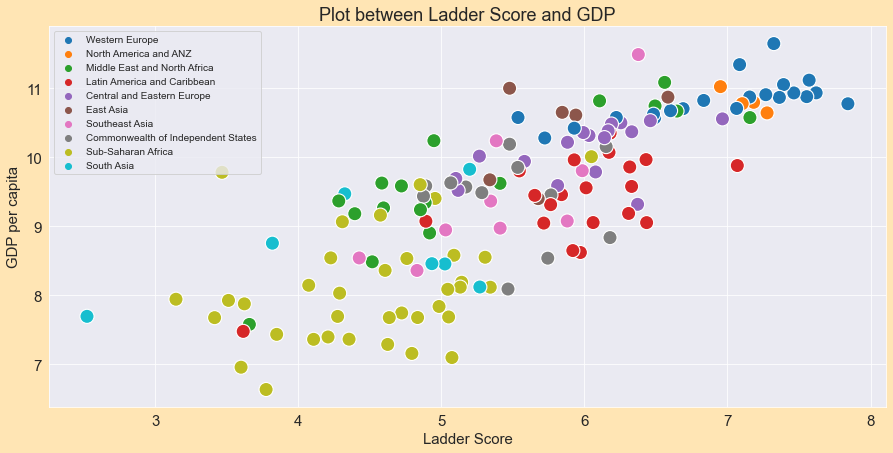

In [18]:
# plot btw happiness and Gdp

plt.rcParams['figure.figsize'] = (15,7)
plt.title("Plot between Ladder Score and GDP")
sns.scatterplot(x=happy_df.ladder_score, y=happy_df.logged_GDP_per_capita, hue= happy_df.regional_indicator, s=200);
plt.legend(loc = 'upper left', fontsize ='10')
plt.xlabel('Ladder Score')
plt.ylabel('GDP per capita')

In [19]:
gdp_region = happy_df.groupby('regional_indicator')['logged_GDP_per_capita'].sum()
gdp_region

regional_indicator
Central and Eastern Europe            171.854
Commonwealth of Independent States    112.822
East Asia                              62.206
Latin America and Caribbean           187.400
Middle East and North Africa          164.324
North America and ANZ                  43.238
South Asia                             60.778
Southeast Asia                         84.793
Sub-Saharan Africa                    290.707
Western Europe                        227.277
Name: logged_GDP_per_capita, dtype: float64

Text(0, 0.5, '')

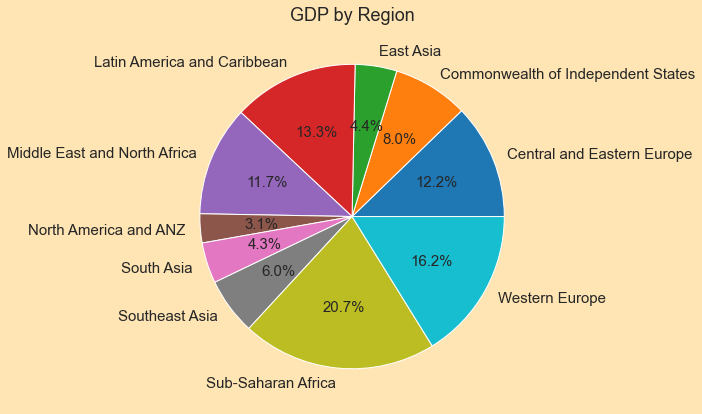

In [20]:
gdp_region.plot.pie(autopct = '%1.1f%%')
plt.title('GDP by Region')
plt.ylabel('')

In [22]:
# Total countries

total_country = happy_df.groupby('regional_indicator')[['country']].count()
print(total_country)

                                    country
regional_indicator                         
Central and Eastern Europe               17
Commonwealth of Independent States       12
East Asia                                 6
Latin America and Caribbean              20
Middle East and North Africa             17
North America and ANZ                     4
South Asia                                7
Southeast Asia                            9
Sub-Saharan Africa                       36
Western Europe                           21


<AxesSubplot:>

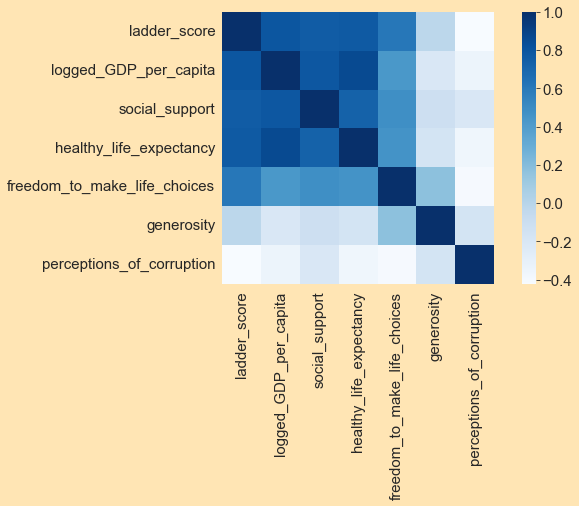

In [24]:
# correlation map
cor = happy_df.corr(method='pearson')
f, ax = plt.subplots(figsize = (10,5))
sns.heatmap(cor, mask = np.zeros_like(cor,dtype=bool),
           cmap='Blues', square=True, ax=ax)

In [25]:
# corruption in regions
corruption = happy_df.groupby('regional_indicator')[['perceptions_of_corruption']].mean()
corruption

,perceptions_of_corruption
regional_indicator,
Central and Eastern Europe,0.850529
Commonwealth of Independent States,0.725083
East Asia,0.683333
Latin America and Caribbean,0.792600
Middle East and North Africa,0.762235
North America and ANZ,0.449250
South Asia,0.797429
Southeast Asia,0.709111
Sub-Saharan Africa,0.765944


<BarContainer object of 10 artists>

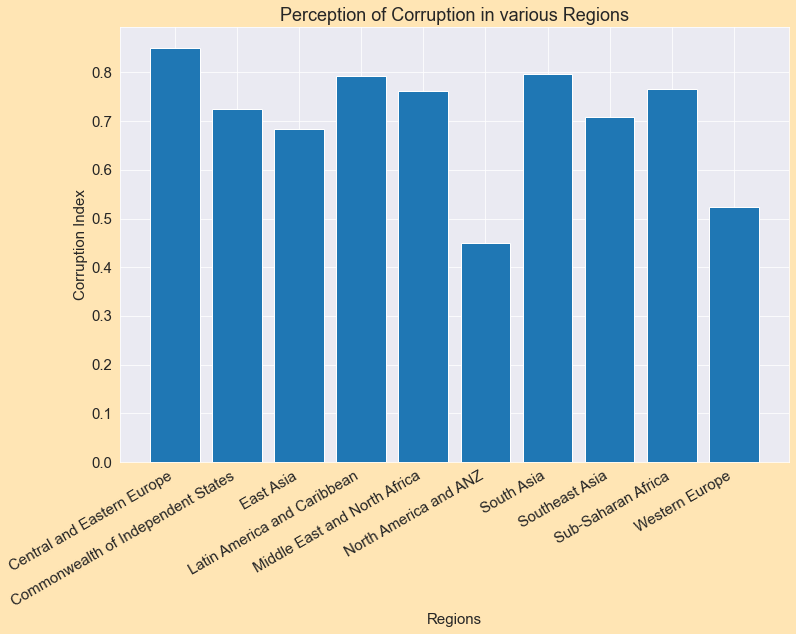

In [27]:
plt.rcParams['figure.figsize']=(12,8)
plt.title('Perception of Corruption in various Regions')
plt.xlabel("Regions", fontsize = 15)
plt.ylabel('Corruption Index', fontsize = 15)
plt.xticks(rotation = 30, ha = 'right')  #ha - horizontal alignment
plt.bar(corruption.index, corruption.perceptions_of_corruption)

In [28]:
top_10 = happy_df.head(10)
bottom_10 = happy_df.tail(10)

Text(599.1068181818181, 0.5, 'Life expectancy')

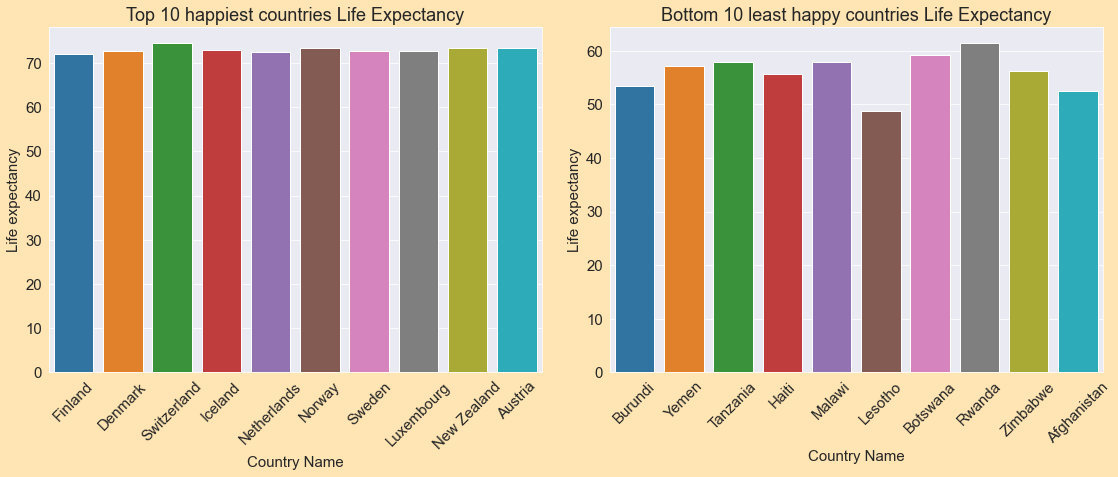

In [41]:
fig, axes = plt.subplots(1,2, figsize=(16,6))
plt.tight_layout(pad=2)
xlabels = top_10.country
axes[0].set_title('Top 10 happiest countries Life Expectancy')
axes[0].tick_params(axis='x', labelrotation = 45)
# axes[0].set_xticklabels(xlabels, rotation=45, ha='right')
sns.barplot(x=top_10.country, y=top_10.healthy_life_expectancy, ax=axes[0])
axes[0].set_xlabel('Country Name')
axes[0].set_ylabel('Life expectancy')

xlabels = bottom_10.country
axes[1].set_title("Bottom 10 least happy countries Life Expectancy")
axes[1].tick_params(axis='x', labelrotation = 45 )
# axes[1].set_xticklabels(xlabels, rotation=45, ha='right')
sns.barplot(x=bottom_10.country, y=bottom_10.healthy_life_expectancy, ax=axes[1])
axes[1].set_xlabel('Country Name')
axes[1].set_ylabel('Life expectancy')

Text(0, 0.5, 'Happiness Score')

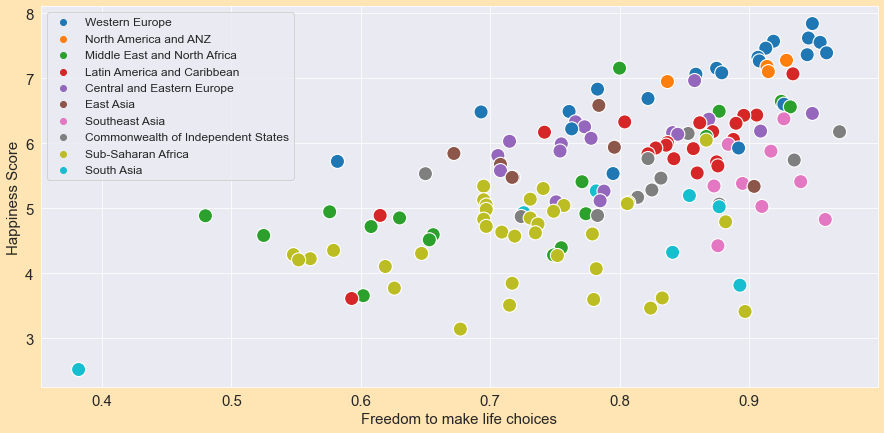

In [44]:
plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x=happy_df.freedom_to_make_life_choices, y=happy_df.ladder_score, hue=happy_df.regional_indicator, s=200)
plt.legend(loc='upper left', fontsize = '12')
plt.xlabel('Freedom to make life choices')
plt.ylabel('Happiness Score')

<BarContainer object of 10 artists>

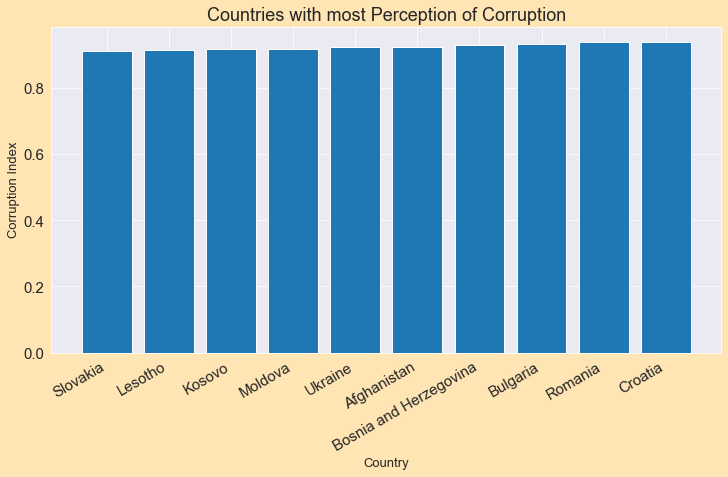

In [46]:
# top 10  most corrupt coutries
country = happy_df.sort_values(by='perceptions_of_corruption').tail(10)
plt.rcParams['figure.figsize']=(12,6)
plt.title('Countries with most Perception of Corruption')
plt.xlabel("Country", fontsize = 13)
plt.ylabel("Corruption Index", fontsize = 13)
plt.xticks(rotation=30 , ha = 'right')
plt.bar(country.country, country.perceptions_of_corruption)

Text(0.5, 0, 'Happiness Score')

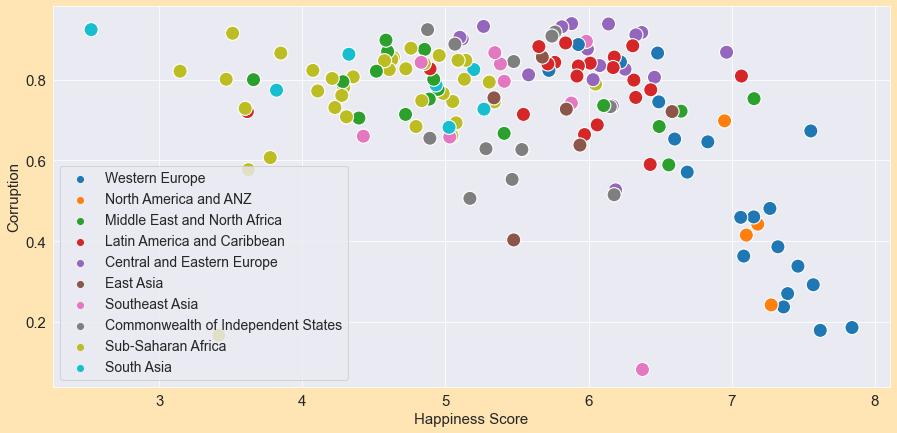

In [49]:
# corruption vs happiness
plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x= happy_df.ladder_score, y =happy_df.perceptions_of_corruption, hue= happy_df.regional_indicator, s=200 )
plt.legend(loc='lower left', fontsize = '14')
plt.ylabel('Corruption')
plt.xlabel('Happiness Score')